In [16]:
#importing the necessary libraries for this project
import pandas as pd
import datetime
import requests

# If you haven't done so previously you will need to install mplfinance

#!pip install mplfinance 
import mplfinance as mpf
import yfinance as yf
import numpy as np
import pytz
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os
import json

import warnings
warnings.filterwarnings("ignore", message="No frequency information was provided*")


In [17]:
import os 

from binance.client import Client

api_key = os.environ.get('BINANCE_API_KEY')
api_key_secret = os.environ.get('Binance_API_KEY_SECRET')


client = Client(api_key, api_key_secret, testnet=True)
cline = Client(api_key, api_key_secret, tld='us')

In [18]:
tickers = client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.05113000'},
 {'symbol': 'LTCBTC', 'price': '0.00165300'},
 {'symbol': 'BNBBTC', 'price': '0.00528300'},
 {'symbol': 'BTCUSDT', 'price': '43952.86000000'},
 {'symbol': 'ETHUSDT', 'price': '2247.53000000'},
 {'symbol': 'TRXBTC', 'price': '0.00000238'},
 {'symbol': 'XRPBTC', 'price': '0.00001437'},
 {'symbol': 'BNBUSDT', 'price': '232.20000000'},
 {'symbol': 'LTCUSDT', 'price': '72.66000000'},
 {'symbol': 'LTCBNB', 'price': '0.31410000'},
 {'symbol': 'XRPUSDT', 'price': '0.63180000'},
 {'symbol': 'XRPBNB', 'price': '0.00272500'},
 {'symbol': 'TRXBNB', 'price': '0.00045190'},
 {'symbol': 'TRXUSDT', 'price': '0.10488000'},
 {'symbol': 'BNBBUSD', 'price': '232.30000000'},
 {'symbol': 'BTCBUSD', 'price': '43962.98000000'},
 {'symbol': 'XRPBUSD', 'price': '0.63180000'},
 {'symbol': 'ETHBUSD', 'price': '2248.08000000'},
 {'symbol': 'LTCBUSD', 'price': '72.66000000'},
 {'symbol': 'NEOBTC', 'price': '0.00027050'},
 {'symbol': 'QTUMETH', 'price': '0.00143800'},
 {

In [19]:
marketdepth = client.get_order_book(symbol='BTCUSDT')
marketdepth

{'lastUpdateId': 535419,
 'bids': [['43953.23000000', '0.00751000'],
  ['43952.70000000', '0.00603000'],
  ['43952.37000000', '0.00706000'],
  ['43952.36000000', '0.01000000'],
  ['43951.21000000', '0.00774000'],
  ['43943.82000000', '0.00786000'],
  ['43943.66000000', '0.01127000'],
  ['43943.46000000', '0.00808000'],
  ['43941.12000000', '0.00763000'],
  ['43939.78000000', '0.00820000'],
  ['43938.98000000', '0.00877000'],
  ['43938.88000000', '0.00740000'],
  ['43937.93000000', '0.00968000'],
  ['43934.92000000', '0.00763000'],
  ['43934.90000000', '0.00661000'],
  ['43934.10000000', '0.00029000'],
  ['43913.85000000', '0.00889000'],
  ['43890.17000000', '0.00029000'],
  ['43846.28000000', '0.00029000'],
  ['43802.43000000', '0.00029000'],
  ['43800.00000000', '0.00982000'],
  ['43772.78000000', '0.00991000'],
  ['43758.63000000', '0.00029000'],
  ['43547.69000000', '0.00655000'],
  ['21971.93000000', '0.02094000']],
 'asks': [['43955.00000000', '0.00729000'],
  ['43955.83000000', '

In [20]:
coin_info = client.get_all_tickers()
df= pd.DataFrame(coin_info)
btc_df = df[df['symbol'] == 'BTCUSDT']
print(btc_df)


    symbol           price
3  BTCUSDT  43952.86000000


In [21]:
exchange_info = client.get_exchange_info()
exchange_info.keys()

dict_keys(['timezone', 'serverTime', 'rateLimits', 'exchangeFilters', 'symbols'])

In [22]:
df = pd.DataFrame(exchange_info['symbols'], )
df

,symbol,status,baseAsset,baseAssetPrecision,quoteAsset,quotePrecision,quoteAssetPrecision,baseCommissionPrecision,quoteCommissionPrecision,orderTypes,...,ocoAllowed,quoteOrderQtyMarketAllowed,allowTrailingStop,cancelReplaceAllowed,isSpotTradingAllowed,isMarginTradingAllowed,filters,permissions,defaultSelfTradePreventionMode,allowedSelfTradePreventionModes
0,ETHBTC,TRADING,ETH,8,BTC,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],EXPIRE_MAKER,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"
1,LTCBTC,TRADING,LTC,8,BTC,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],EXPIRE_MAKER,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"
2,BNBBTC,TRADING,BNB,8,BTC,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],EXPIRE_MAKER,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"
3,BTCUSDT,TRADING,BTC,8,USDT,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],EXPIRE_MAKER,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"
4,ETHUSDT,TRADING,ETH,8,USDT,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],EXPIRE_MAKER,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,VANRYBTC,TRADING,VANRY,8,BTC,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],EXPIRE_MAKER,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"
1153,AUCTIONFDUSD,TRADING,AUCTION,8,FDUSD,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],EXPIRE_MAKER,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"
1154,IOTAFDUSD,TRADING,IOTA,8,FDUSD,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],EXPIRE_MAKER,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"
1155,LUNCTRY,TRADING,LUNC,8,TRY,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",...,True,True,True,True,True,False,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...",[SPOT],EXPIRE_MAKER,"[NONE, EXPIRE_TAKER, EXPIRE_MAKER, EXPIRE_BOTH]"


In [23]:
recent_trades = client.get_recent_trades(symbol='BTCUSDT')
df = pd.DataFrame(recent_trades)
df.head()

,id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
0,42848,43952.37000000,0.00443000,194.70899910,1701919656008,False,True
1,42849,43952.37000000,0.00138000,60.65427060,1701919656020,False,True
2,42850,43954.30000000,0.00649000,285.26340700,1701919657287,False,True
3,42851,43954.30000000,0.00216000,94.94128800,1701919657310,False,True
4,42852,43955.09000000,0.00922000,405.26592980,1701919658511,False,True


In [24]:
id = df.loc[300, 'id']
history_trades = client.get_historical_trades(symbol='BTCUSDT', limit=1000, fromId = id)
df = pd.DataFrame(history_trades)
df

,id,price,qty,quoteQty,time,isBuyerMaker,isBestMatch
0,43148,43943.27000000,0.00035000,15.38014450,1701920214778,True,True
1,43149,43943.27000000,0.00683000,300.13253410,1701920214794,True,True
2,43150,43943.27000000,0.00056000,24.60823120,1701920215589,True,True
3,43151,43943.26000000,0.00764000,335.72650640,1701920215589,True,True
4,43152,43943.26000000,0.00236000,103.70609360,1701920215596,True,True
...,...,...,...,...,...,...,...
195,43343,43948.78000000,0.00023000,10.10821940,1701920965431,False,True
196,43344,43948.78000000,0.00660000,290.06194800,1701920965463,False,True
197,43345,43948.78000000,0.00239000,105.03758420,1701920966630,False,True
198,43346,43952.86000000,0.00808000,355.13910880,1701920966630,False,True


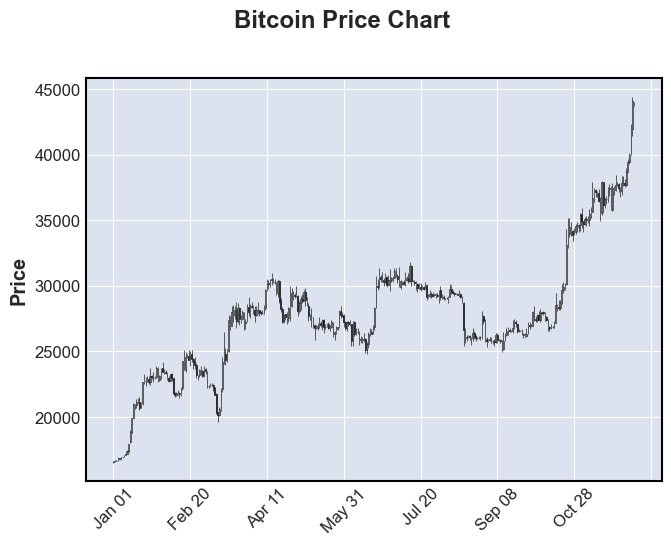

In [25]:
ticker_symbol = "BTC-USD"

bitcoin_ticker = yf.Ticker(ticker_symbol)
bitcoin_data = bitcoin_ticker.history(period="max")
bitcoin_data = bitcoin_data['2023-01-01':]

bitcoin_data.to_csv("bitcoin_price_data.csv")
    
mpf.plot(bitcoin_data, type='candle', title="Bitcoin Price Chart")


In [30]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the CSV data
df = pd.read_csv('bitcoin_price_data.csv')

# Rename the columns
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

# Convert 'ds' to datetime
df['ds'] = pd.to_datetime(df['ds'])

# Set 'ds' as the index
df.set_index('ds', inplace=True)

# Ensure data is sorted by date (in case it's not sorted)
df = df.sort_index()

# Define the training data
train_data = df.iloc[:-50]  # Using all data except the last 50 points for training

# Train the ARIMA model
order = (5, 1, 0)  # Example order, you can tune this
model = ARIMA(train_data['y'], order=order)
results = model.fit()

# Forecast the next x days using the trained model
forecast_steps = 50
forecast = results.get_forecast(steps=forecast_steps)

# Get the predicted values and confidence intervals for the future period
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a date range for the forecasted dates
forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1)[1:]

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'ds': forecast_dates, 'yhat': predicted_values})

# Print the forecasted values
print(forecast_df)


                                                 ds          yhat
2023-10-18 00:00:00+00:00 2023-12-08 00:00:00+00:00  28537.894366
2023-10-19 00:00:00+00:00 2023-12-09 00:00:00+00:00  28592.825866
2023-10-20 00:00:00+00:00 2023-12-10 00:00:00+00:00  28586.929920
2023-10-21 00:00:00+00:00 2023-12-11 00:00:00+00:00  28579.446913
2023-10-22 00:00:00+00:00 2023-12-12 00:00:00+00:00  28582.458835
2023-10-23 00:00:00+00:00 2023-12-13 00:00:00+00:00  28579.663683
2023-10-24 00:00:00+00:00 2023-12-14 00:00:00+00:00  28578.849528
2023-10-25 00:00:00+00:00 2023-12-15 00:00:00+00:00  28578.888746
2023-10-26 00:00:00+00:00 2023-12-16 00:00:00+00:00  28578.775588
2023-10-27 00:00:00+00:00 2023-12-17 00:00:00+00:00  28578.713017
2023-10-28 00:00:00+00:00 2023-12-18 00:00:00+00:00  28578.747514
2023-10-29 00:00:00+00:00 2023-12-19 00:00:00+00:00  28578.747662
2023-10-30 00:00:00+00:00 2023-12-20 00:00:00+00:00  28578.747430
2023-10-31 00:00:00+00:00 2023-12-21 00:00:00+00:00  28578.750912
2023-11-01

In [34]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import itertools

# Load the CSV data
df = pd.read_csv('bitcoin_price_data.csv')

# Rename the columns
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

# Convert 'ds' to datetime
df['ds'] = pd.to_datetime(df['ds'])

# Set 'ds' as the index
df.set_index('ds', inplace=True)

# Ensure data is sorted by date (in case it's not sorted)
df = df.sort_index()

# Split the dataset into training, validation, and test sets
total_length = len(df)
train_size = int(total_length * 0.7)  # 70% for training
val_size = int(total_length * 0.15)  # 15% for validation
test_size = total_length - train_size - val_size  # Remaining for testing

train_data = df.iloc[:train_size]
val_data = df.iloc[train_size:train_size + val_size]
test_data = df.iloc[train_size + val_size:]

best_rmse = float('inf')
best_order = None

# Hyperparameter tuning with a wider range and longer forecast horizon
for p, d, q in itertools.product(range(6), repeat=3):  
    for P, D, Q, s in itertools.product(range(3), repeat=4):  
        param = (p, d, q, P, D, Q, s)
        try:
            model = SARIMAX(train_data['y'], order=(p, d, q), seasonal_order=(P, D, Q, s))
            results = model.fit()
            forecast = results.get_forecast(steps=len(val_data) + len(test_data))  # Extend forecast to include test set
            predicted_values = forecast.predicted_mean
            # Calculate RMSE on both validation and test data
            rmse_val = mean_squared_error(val_data['y'], predicted_values[:len(val_data)]) ** 0.5
            rmse_test = mean_squared_error(test_data['y'], predicted_values[len(val_data):]) ** 0.5
            rmse = rmse_val + rmse_test  # Combined RMSE for validation and test data

            if rmse < best_rmse:
                best_rmse = rmse
                best_order = param

        except Exception as e:
            print(f"Error for {param}: {e}")
            continue

# Train the model with the best parameters using the entire dataset
model = SARIMAX(df['y'], order=best_order[:3], seasonal_order=best_order[3:])
results = model.fit()

# Forecast the next x days using the trained model on the entire dataset
forecast_steps = len(test_data)  # Forecast the length of the test set
forecast = results.get_forecast(steps=forecast_steps)

# Get the predicted values and confidence intervals for the test period
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a date range for the forecasted dates
forecast_dates = pd.date_range(start=test_data.index[0], periods=forecast_steps)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'ds': forecast_dates, 'yhat': predicted_values})


Error for (0, 0, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 0, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (0, 0, 0, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (0, 0, 0, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (0, 0, 0, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 0, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 0, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn(

Error for (0, 0, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting p

Error for (0, 0, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting p

Error for (0, 0, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 0, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 0, 1, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 1, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 0, 1, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 1, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 0, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 0, 1, 1, 0): Mus

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (0, 0, 2, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 2, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 2, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (0, 0, 2, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 2, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 2, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 0, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 2, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 2, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 2, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 0, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 0, 3, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 3, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 3, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 3, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 3, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 3, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 3, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 3, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 3, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (0, 0, 3, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 3, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 3, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 3, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 3, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 3, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 3, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 3, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 3, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 0, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 0, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 0, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (0, 0, 4, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 4, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 4, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 4, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 4, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 4, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 0, 4, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 4, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 4, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 4, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 4, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (0, 0, 4, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 4, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 4, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 4, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 4, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 0, 4, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 4, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 4, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 4, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 4, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 0, 4, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 4, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 4, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 4, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 4, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 0, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn(

Error for (0, 0, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 5, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 0, 5, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 5, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 5, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 5, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 5, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (0, 0, 5, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 5, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 5, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 5, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 5, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 0, 5, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 5, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 5, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 5, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 5, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 0, 5, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 5, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 5, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 5, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 5, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 0, 5, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 5, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 0, 5, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 0, 5, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 0, 5, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 0, 0, 2, 0): 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 1, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 1, 0, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 1, 0, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 0, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 0, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 1, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 1, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 1, 1, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 1, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 1, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 1, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 1, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 2, 0, 1, 1, 0): Mus

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 1, 2, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 2, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 2, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 2, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 2, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 2, 2, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 2, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 2, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 1, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 3, 0, 1, 1, 0): Mus

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 1, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 3, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 1, 3, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 3, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 3, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 3, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 3, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 3, 1, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 3, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 3, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 3, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 1, 3, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 3, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 3, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 3, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 3, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 3, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 4, 0, 0, 1, 2): Inv

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 1, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 4, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 1, 4, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 4, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 4, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 4, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 4, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 4, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 4, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 4, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 1, 4, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 4, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 4, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 4, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 4, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 4, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 4, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 4, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 4, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 1, 4, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 4, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 4, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 4, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 4, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 4, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 4, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 4, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 1, 4, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 4, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 4, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 4, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 4, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 4, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 5, 0, 0, 1, 2): 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 1, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 5, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 1, 5, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 5, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 5, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 5, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 5, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 1, 5, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 5, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 5, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 5, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 5, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 1, 5, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 5, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 5, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 5, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 5, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 1, 5, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 5, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 5, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 5, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 5, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 1, 5, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 5, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 1, 5, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 1, 5, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 1, 5, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 0, 0, 2, 0): 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 2, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 2, 0, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 2, 0, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 0, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 0, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 2, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 2, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 2, 1, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 2, 1, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 2, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 2, 1, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 1, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 1, 2, 2, 2, 2): LU decomposition error.
Error for (0, 2, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 0, 0, 1, 0): Must include nonzero seasonal pe

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 2, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 2, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 2, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 2, 2, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 2, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 1, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 2, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 2, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 2, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 2, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 2, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 3, 0, 0, 1, 2): Inv

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 2, 3, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 3, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 3, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 3, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 3, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 3, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 3, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 3, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 3, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 2, 3, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 3, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 3, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 3, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 3, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 3, 1, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 3, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 3, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 3, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 2, 3, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 3, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 3, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 3, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 3, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 3, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 4, 0, 0, 1, 2): Inv

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 2, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 2, 4, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 4, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 4, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 4, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 4, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 4, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 4, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 4, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 4, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 2, 4, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 4, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 4, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 4, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 4, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 4, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 4, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 4, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 2, 4, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 4, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 4, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 4, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 4, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 4, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 4, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 4, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 4, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 2, 4, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 4, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 4, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 4, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 4, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 4, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 5, 0, 0, 1, 2): 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 2, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 2, 5, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 5, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 5, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 5, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 5, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 2, 5, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 5, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 5, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 5, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 5, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 2, 5, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 5, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 5, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 5, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 5, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 2, 5, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 5, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 5, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 5, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 5, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 2, 5, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 5, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 5, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 5, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 5, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 2, 5, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 5, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 2, 5, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 2, 5, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 2, 5, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 0, 0, 0, 2, 0): 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 3, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 0, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 0, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 0, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 0, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 0, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 0, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 0, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 0, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 3, 0, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 0, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 0, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 0, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn(

Error for (0, 3, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 3, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 1, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 1, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 1, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 1, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 3, 1, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 1, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 1, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 3, 1, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 1, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 1, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 3, 1, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 1, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 3, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 2, 0, 1, 1, 0): Mus

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 2, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 2, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 2, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 2, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 2, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 2, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 2, 1, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 2, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 2, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 2, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 2, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 2, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 2, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 2, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 2, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 2, 2, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 2, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 2, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 2, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 2, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 2, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 2, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 2, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 3, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 3, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 3, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 3, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 3, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 3, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 3, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 3, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 3, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 3, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 3, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 3, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 3, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 3, 1, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 3, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 3, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 3, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn(

Error for (0, 3, 3, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 3, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 3, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 3, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 3, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 3, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 3, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 3, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 3, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn(

Error for (0, 3, 3, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 3, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 3, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 3, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 3, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 3, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 4, 0, 0, 1, 2): Inv

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 4, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 4, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 4, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 4, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 4, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 4, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 4, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 4, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 4, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 4, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 4, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 4, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 4, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 4, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 4, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 4, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 4, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 4, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 4, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 4, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 4, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 4, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 4, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 4, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 4, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 4, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 5, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 5, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 5, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 5, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 5, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 5, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 5, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 5, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 5, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 5, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 5, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 5, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 5, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 5, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 5, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 3, 5, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 5, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 5, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 5, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 5, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 5, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting paramete

Error for (0, 3, 5, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 5, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 3, 5, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 3, 5, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 3, 5, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 0, 0, 0, 2, 0): 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 4, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 4, 0, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 0, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 0, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 4, 0, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 0, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 0, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 4, 0, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 0, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 4, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 0, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 0, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 0, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 0, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.


Error for (0, 4, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parame

Error for (0, 4, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 4, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting par

Error for (0, 4, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 1, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 1, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 4, 1, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 1, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 1, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 4, 1, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 1, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warni

Error for (0, 4, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn(

Error for (0, 4, 1, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (0, 4, 1, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 1, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 4, 1, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 1, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 1, 2, 2, 2, 2): LU decomposition error.
Error for (0, 4, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters

Error for (0, 4, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 2, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 2, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 2, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 2, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 2, 1, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 2, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 2, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 2, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 2, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 2, 1, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 2, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 2, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 2, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 2, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 2, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 2, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 2, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 2, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 2, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 2, 2, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 2, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 2, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 2, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 2, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 2, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 3, 0, 0, 1, 2): Inv

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 3, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 3, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 3, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 3, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 3, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 3, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 3, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 3, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 3, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 3, 1, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 3, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 3, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 3, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 3, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 3, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 3, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 3, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 3, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 3, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 3, 2, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 3, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 3, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 3, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 3, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 3, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 3, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 4, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 4, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 4, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 4, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 4, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 4, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 4, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 4, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 4, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 4, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 4, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 4, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 4, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 4, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 4, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 4, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 4, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 4, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 4, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 4, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 4, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 4, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 4, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 5, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 5, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 5, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 5, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 5, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 5, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 5, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 5, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 5, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 5, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 5, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 5, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 4, 5, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 5, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 5, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 4, 5, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 4, 5, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 4, 5, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 4, 5, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 0, 0, 0, 2, 0): 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 5, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 5, 0, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 0, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 0, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 5, 0, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 0, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 0, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 5, 0, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 0, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting p

Error for (0, 5, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 0, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 0, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 0, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 0, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting par

Error for (0, 5, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parame

Error for (0, 5, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parame

Error for (0, 5, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 5, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 5, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 1, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 5, 1, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.


Error for (0, 5, 1, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 1, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 1, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.


Error for (0, 5, 1, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 1, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.


Error for (0, 5, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 5, 1, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 1, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 1, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (0, 5, 1, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 1, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn(

Error for (0, 5, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 2, 0, 1, 1, 0): Mus

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 2, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 2, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 2, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 2, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 2, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 2, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 2, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 2, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 2, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 2, 1, 2, 0, 2): LU decomposition error.
Error for (0, 5, 2, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 2, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 2, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 2, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 2, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 2, 1, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 2, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 2, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 2, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 2, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 2, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 2, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 2, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 2, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 2, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 2, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 2, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn(

Error for (0, 5, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 2, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 2, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 2, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 2, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 2, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 3, 0, 0, 1, 2): Inv

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 3, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 3, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 3, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 3, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 3, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 3, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 3, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 3, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 3, 1, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 3, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 3, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 3, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 3, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 3, 1, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 3, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 3, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 3, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 3, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 3, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 3, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 3, 2, 1, 0, 2): LU decomposition error.
Error for (0, 5, 3, 2, 1, 1, 0): Must include nonzero sea

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 3, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 3, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 3, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 3, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 3, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 4, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 4, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 4, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 4, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 4, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 4, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 4, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 4, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 4, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 4, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 4, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 4, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 4, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 4, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 4, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 4, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 4, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 4, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 4, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 4, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 4, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 4, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 4, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 5, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 5, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 5, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 5, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 5, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 5, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 5, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 5, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 5, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 5, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 5, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 5, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 5, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 5, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 5, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (0, 5, 5, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 5, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 5, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 5, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 5, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 5, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as

Error for (0, 5, 5, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 5, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (0, 5, 5, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (0, 5, 5, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (0, 5, 5, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 0, 0, 2, 0): 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autore

Error for (1, 0, 0, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using ze

Error for (1, 0, 0, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 0, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 0, 0, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 0, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 0, 0, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 0, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting sea

Error for (1, 0, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 0, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using ze

Error for (1, 0, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


Error for (1, 0, 1, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using ze

Error for (1, 0, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 0, 1, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 1, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 1, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (1, 0, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 0, 1, 1, 0): Mus

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (1, 0, 2, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 0, 2, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 1, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (1, 0, 2, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 2, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as

Error for (1, 0, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 2, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 2, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 2, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 3, 0, 0, 1, 2): Inv

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 0, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 3, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as start

Error for (1, 0, 3, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 3, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 3, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 3, 1, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 3, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (1, 0, 3, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 3, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 3, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 3, 1, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 3, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 0, 3, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 3, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 3, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 3, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 3, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 0, 3, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 3, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 3, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 3, 2, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 3, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (1, 0, 3, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 3, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 3, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 3, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 3, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 0, 0, 1, 2): Inv

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 0, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (1, 0, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 0, 4, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 4, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 4, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 0, 4, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 4, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 4, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (1, 0, 4, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 4, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 4, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 0, 4, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 4, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 4, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 0, 4, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 4, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 4, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (1, 0, 4, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 4, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 4, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 4, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 5, 0, 0, 1, 2): 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting

Error for (1, 0, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 5, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 0, 5, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 5, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 5, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 5, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 5, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


Error for (1, 0, 5, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 5, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 5, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 5, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 5, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 0, 5, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 5, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 5, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 5, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 5, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 0, 5, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 5, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 5, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 5, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 5, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 0, 5, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 5, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 0, 5, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 0, 5, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 0, 5, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 0, 0, 2, 0): 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 1, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 0, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 0, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 0, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 0, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 1, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 1, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 1, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 1, 1, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 1, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 1, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 1, 2, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 2, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 2, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 2, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 2, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 2, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 2, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 2, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 2, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 1, 2, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 2, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 2, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 2, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 2, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 2, 1, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 2, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 2, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 2, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 2, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 2, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 2, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 2, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 2, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 3, 0, 0, 1, 2): Inv

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 1, 3, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 3, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 3, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 3, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 3, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 3, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 3, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 3, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 3, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 3, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 3, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 3, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 3, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 3, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 3, 1, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 3, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 3, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 3, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 1, 3, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 3, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 3, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 3, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 3, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 3, 2, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 3, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 3, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 3, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 1, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 1, 4, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 4, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 4, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 4, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 4, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 4, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 4, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 4, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 4, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 4, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 4, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 4, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 4, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 4, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 4, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 4, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 4, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 1, 4, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 4, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 4, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 4, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 4, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 4, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 4, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 4, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 4, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 4, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 4, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 4, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 4, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 4, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 5, 0, 0, 1, 2): 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 1, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 5, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 5, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 5, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 5, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 5, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 1, 5, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 5, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 5, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 5, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 5, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 5, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 5, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 5, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 5, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 5, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 5, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 5, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 5, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 5, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 5, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 1, 5, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 5, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 5, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 5, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 5, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 1, 5, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 5, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 1, 5, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 1, 5, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 1, 5, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 0, 0, 2, 0): 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 2, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 0, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 0, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 0, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 0, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 0, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 2, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 2, 1, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 1, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 1, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 1, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 1, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 2, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 2, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 2, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 2, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 1, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 2, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 2, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 2, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 2, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 2, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 2, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 3, 0, 1, 1, 0): Mus

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 3, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 3, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 3, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 3, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 3, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 3, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 3, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 3, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 3, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 3, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 3, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 3, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 3, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 3, 1, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 3, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 3, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 3, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 3, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 3, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 3, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 3, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 3, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 3, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 3, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 3, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 3, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 3, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 3, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 3, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 3, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 3, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 3, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 4, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 4, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 4, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 4, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 4, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 4, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 4, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 4, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 4, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 4, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 4, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 4, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 4, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 4, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 4, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 4, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 4, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 4, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 4, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 4, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 4, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 4, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 4, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 4, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 4, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 4, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 4, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 4, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 4, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 4, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 5, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 5, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 5, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 5, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 5, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 5, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 5, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 5, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 5, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 5, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 5, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 5, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 5, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 5, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 5, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 5, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 5, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 5, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 5, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 5, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 2, 5, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 5, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 5, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 5, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 5, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 2, 5, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 5, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 2, 5, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 2, 5, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 2, 5, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 0, 0, 0, 2, 0): 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 3, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 3, 0, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 0, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 0, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 0, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 3, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 3, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 3, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 1, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 3, 1, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 1, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 1, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 1, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 3, 1, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 1, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 3, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 3, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 3, 1, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 3, 1, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 1, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 3, 1, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 1, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 2, 0, 1, 1, 0): Mus

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 2, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 2, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 2, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 2, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 2, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 2, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 2, 1, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 2, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 2, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 2, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 2, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 2, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 2, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 2, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 2, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 2, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 2, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 2, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 2, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 2, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 2, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 2, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 2, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 2, 2, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 2, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 2, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 3, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 3, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 3, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 3, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 3, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 3, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 3, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 3, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 3, 1, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 3, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 3, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 3, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 3, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 3, 1, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 3, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 3, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 3, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 3, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 3, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 3, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 3, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 3, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 3, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 3, 2, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 3, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 3, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 3, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 3, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 3, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 3, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 4, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 4, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 4, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 4, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 4, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 4, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 4, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 4, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 4, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 4, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 4, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 4, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 4, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 4, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 4, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 4, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 4, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 4, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 4, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 4, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 4, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 4, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 4, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 4, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 4, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 4, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 5, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 5, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 5, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 5, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 5, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 5, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 5, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 5, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 5, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 5, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 5, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 5, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 5, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 5, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 5, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 5, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 5, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 5, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 5, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 5, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 3, 5, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 5, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 5, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 5, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 5, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 3, 5, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 5, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 3, 5, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 3, 5, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 3, 5, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 0, 0, 0, 2, 0): 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 4, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 4, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 4, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 4, 0, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 0, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 4, 0, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 0, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 0, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 0, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 4, 0, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 0, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 4, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 4, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 4, 0, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 4, 0, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 0, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 0, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 0, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.


Error for (1, 4, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 4, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 4, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 4, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 4, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 4, 1, 1, 0, 2, 2): LU decomposition error.
Error for (1, 4, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 1, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 1, 1, 1, 1, 2): LU decomposition error.
Error for (1, 4, 1, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 4, 1, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 1, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 1, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 1, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 1, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 4, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.


Error for (1, 4, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 1, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 4, 1, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 1, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 4, 1, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 1, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn(

Error for (1, 4, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 2, 0, 1, 1, 0): Mus

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 2, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 2, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 2, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 2, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 2, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 2, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 2, 1, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 2, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 2, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 2, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 2, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 2, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 2, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 2, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 2, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 2, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 2, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 2, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 2, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 2, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 2, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 2, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 2, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 2, 2, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 2, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 2, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 4, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 2, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 2, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 2, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 2, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 2, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 4, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 3, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 3, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 3, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 3, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 3, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 3, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 3, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 3, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 3, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 3, 1, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 3, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 3, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 3, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 3, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 3, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 3, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 3, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 3, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 3, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 3, 2, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 3, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 3, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 3, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 4, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 4, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 4, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 4, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 4, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 4, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 4, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 4, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 4, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 4, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 4, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 4, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 4, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 4, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 4, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 4, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 4, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 4, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 4, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 4, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 4, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 4, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 4, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 4, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 4, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 4, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 4, 2, 2, 0, 2): LU decomposition error.
Error for (1, 4, 4, 2, 2, 1, 0): Must include nonzero 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 5, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 5, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 5, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 5, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 5, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 5, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 5, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 5, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 5, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 5, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 5, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 5, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 5, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 5, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 5, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 5, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 4, 5, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 5, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 5, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 5, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 5, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 4, 5, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 5, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 4, 5, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 4, 5, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 4, 5, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 0, 0, 0, 2, 0): 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 5, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 5, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting p

Error for (1, 5, 0, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 0, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 0, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 5, 0, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 0, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 0, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 5, 0, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 0, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 5, 0, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 5, 0, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 0, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 5, 0, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 5, 0, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 0, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 0, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 0, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.


Error for (1, 5, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 5, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 5, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 5, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 5, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 5, 1, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 1, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warni

Error for (1, 5, 1, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 5, 1, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 1, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 1, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 1, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 1, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 5, 1, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 5, 1, 2, 0, 2, 2): LU decomposition error.
Error for (1, 5, 1, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 1, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.


Error for (1, 5, 1, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 5, 1, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (1, 5, 1, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (1, 5, 1, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 1, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 2, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 2, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 2, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 2, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 2, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 2, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 2, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn(

Error for (1, 5, 2, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 2, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 2, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 2, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 2, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 2, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 2, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 2, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 2, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 2, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 2, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 2, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 2, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 2, 1, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 2, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 2, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 2, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 2, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 2, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 2, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 2, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 2, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 2, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 2, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 2, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 2, 2, 1, 0, 2): LU decomposition error.
Error for (1, 5, 2, 2, 1, 1, 0): Must include nonzero sea

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 2, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 2, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 2, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 2, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 2, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 2, 2, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 3, 0, 0, 1, 2): Inv

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 3, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 3, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 3, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 3, 1, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 3, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 3, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 3, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 3, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 3, 1, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 3, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 3, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 3, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 3, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 3, 1, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 3, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 3, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 3, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 3, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 3, 2, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 3, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 3, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 3, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 3, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 3, 2, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 3, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 3, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 3, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 4, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 1, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 4, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 1, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 4, 1, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 1, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 4, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 4, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 4, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 4, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 4, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 4, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 4, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 4, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 4, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 4, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 4, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 4, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 4, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 4, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 4, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 4, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 5, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 5, 1, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 1, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 5, 1, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 5, 1, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 1, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 5, 1, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 5, 1, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 1, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 5, 1, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 1, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 5, 1, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 5, 1, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 1, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 5, 1, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 5, 2, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 2, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 5, 2, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 2, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 5, 2, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 5, 2, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 2, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 5, 2, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 5, 2, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 2, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (1, 5, 5, 2, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 2, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 5, 2, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 5, 2, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 2, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 5, 2, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 5, 2, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 2, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters foun

Error for (1, 5, 5, 2, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 2, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 5, 2, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (1, 5, 5, 2, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (1, 5, 5, 2, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (1, 5, 5, 2, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 0, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 0, 0, 0, 2, 0): 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 0, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. 

Error for (2, 0, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check ml

Error for (2, 0, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting

Error for (2, 0, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 0, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 0, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 0, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (2, 0, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 2, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (2, 0, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 0, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 0, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (2, 0, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 0, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 0, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (2, 0, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 0, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 0, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 0, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 0, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 0, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 1, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 1, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 1, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 1, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 1, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 1, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 1, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 1, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 1, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 1, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 1, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 1, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 1, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 1, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 1, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 1, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 1, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 1, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 1, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 1, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 1, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 1, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 1, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 1, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 2, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 2, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 2, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 2, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 2, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 2, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 2, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 2, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 2, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 2, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 2, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 2, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 2, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting pa

Error for (2, 2, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 2, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 2, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 2, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 2, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 2, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 2, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 2, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 2, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 2, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 2, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 2, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 3, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 3, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 3, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 3, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 3, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 3, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 3, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 3, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 2, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 3, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 3, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 3, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 3, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 3, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 3, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 3, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 3, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 3, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 3, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 3, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 3, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 3, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 3, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 4, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 4, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 4, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 4, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 4, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 4, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 4, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.


Error for (2, 4, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 4, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 4, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn(

Error for (2, 4, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 2, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 2, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 4, 2, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 2, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 2, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 4, 2, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 2, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 4, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 4, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 4, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 4, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 4, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 4, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 4, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 4, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 4, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 4, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 4, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 4, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 4, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 4, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 4, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 4, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 4, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 4, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 4, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 4, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 4, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 4, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 4, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 4, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 4, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 4, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 5, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 5, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 5, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 5, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 5, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 5, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 5, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 5, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 5, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (2, 5, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (2, 5, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 5, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (2, 5, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 5, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 5, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 5, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 2, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 2, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 2, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 2, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 2, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 2, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 2, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 5, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 5, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 5, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 5, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 5, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 5, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 5, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 5, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 5, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (2, 5, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (2, 5, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (2, 5, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (2, 5, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (2, 5, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal movi

Error for (3, 0, 0, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 0, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 0, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 0, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 0, 0, 1, 0, 1, 0): Must include nonzero sea

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check m

Error for (3, 0, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (3, 0, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 0, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 0, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (3, 0, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 0, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 0, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 0, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 2, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 2, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 2, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 2, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 2, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 2, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 2, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 0, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 2, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 0, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 0, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (3, 0, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (3, 0, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 0, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 0, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (3, 0, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (3, 0, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 0, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 0, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 0, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 0, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 0, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 0, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 1, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 1, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 1, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 1, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 1, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 1, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (3, 1, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 1, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 1, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 1, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 1, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 2, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 2, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 1, 2, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 2, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 2, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 1, 2, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 2, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 1, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 1, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 1, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 2, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 1, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 1, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 1, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 1, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 1, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 1, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 1, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 1, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 1, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 1, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 1, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 1, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 1, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 1, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 1, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 1, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 1, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 1, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 1, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 1, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 1, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 2, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 2, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 2, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 2, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 2, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 1, 0, 0, 2, 2): LU decomposition error.
Error for (3, 2, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 2, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (3, 2, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (3, 2, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 2, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 2, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 2, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 2, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 2, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as

Error for (3, 2, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 2, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting pa

Error for (3, 2, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 2, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 2, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 2, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (3, 2, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (3, 2, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 2, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 2, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 2, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 2, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 2, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 2, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 3, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 3, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 3, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 3, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 3, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 3, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as star

Error for (3, 3, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 3, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 3, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 3, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 3, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 3, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 3, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 3, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 3, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 3, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 3, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 3, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 3, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 3, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 3, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (3, 3, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 3, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 3, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 3, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (3, 4, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (3, 4, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 4, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 4, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 4, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (3, 4, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (3, 4, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 4, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (3, 4, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 4, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 4, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 4, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 4, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 4, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 4, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 4, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 4, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 4, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 4, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 4, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 4, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 4, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 4, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (3, 4, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 4, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 4, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 4, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (3, 5, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (3, 5, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 5, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 5, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 5, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 5, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (3, 5, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (3, 5, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (3, 5, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 5, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (3, 5, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 5, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 5, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (3, 5, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 5, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 5, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 5, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 2, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 5, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 5, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 5, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 5, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 5, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 5, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 5, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 5, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (3, 5, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (3, 5, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (3, 5, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (3, 5, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (3, 5, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (4, 0, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using z

Error for (4, 0, 0, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 0, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 0, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 0, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 0, 0, 1, 0, 1, 0): Must include nonzero sea

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (4, 0, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (4, 0, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 0, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 0, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 0, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 0, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 0, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 0, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 0, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 0, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 0, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 2, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 2, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 2, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 2, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 2, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 2, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 2, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 0, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 2, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 0, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 0, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 0, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 0, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 0, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 0, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 0, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 0, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 0, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 0, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 0, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 0, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 0, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 0, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (4, 1, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 1, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 1, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 1, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 1, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 1, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 1, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (4, 1, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 1, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 1, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 1, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 1, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 1, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 2, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 2, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 2, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 2, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 2, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 2, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 2, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as

Error for (4, 1, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 1, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 1, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 1, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 1, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 1, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 1, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 1, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 1, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 1, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 1, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 1, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 1, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 2, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 2, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (4, 2, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (4, 2, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 2, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 2, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 2, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 2, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 2, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 2, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 2, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (4, 2, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 2, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 2, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 2, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 2, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 2, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 2, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 2, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as

Error for (4, 2, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 2, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 2, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 2, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 2, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 2, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 2, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 2, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 2, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 2, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 2, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 2, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 2, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 2, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 2, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 3, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 3, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 3, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 3, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 3, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 3, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 3, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 3, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 3, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (4, 3, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 3, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 3, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 3, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 3, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 3, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 2, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 2, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 2, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 2, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 2, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 2, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 2, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 3, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 2, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 3, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 3, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 3, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 3, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 3, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 3, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 3, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 3, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 3, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 3, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 3, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (4, 3, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 3, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 3, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 3, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (4, 4, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 4, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.


Error for (4, 4, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 4, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 4, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (4, 4, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.


Error for (4, 4, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  w

Error for (4, 4, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 4, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (4, 4, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 4, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 4, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 4, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 4, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 4, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 4, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 2, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 4, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 4, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 4, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 4, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 4, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 4, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 4, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 4, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 4, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 4, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 4, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 4, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 4, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 4, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or dif

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (4, 5, 0, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 0, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (4, 5, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (4, 5, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 5, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 5, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 5, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 5, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 5, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (4, 5, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.


Error for (4, 5, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  w

Error for (4, 5, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 5, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  w

Error for (4, 5, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 5, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 5, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (4, 5, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (4, 5, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 5, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 5, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 2, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 5, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 5, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 5, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 5, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 5, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 5, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 5, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 5, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 5, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 5, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (4, 5, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (4, 5, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (4, 5, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (4, 5, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (4, 5, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (5, 0, 0, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 0, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (5, 0, 0, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 0, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 0, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 0, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 0, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 0, 0, 1, 0, 1, 0): Must include nonzero sea

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (5, 0, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (5, 0, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 0, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 0, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 0, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (5, 0, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 0, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 0, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (5, 0, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 0, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 0, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 2, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 2, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 2, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 2, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 2, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 2, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 2, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 0, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 2, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 0, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 0, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 0, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 0, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 0, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 0, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 0, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (5, 0, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Error for (5, 0, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 0, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 0, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 0, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 0, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 0, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 0, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (5, 1, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 1, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 1, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 1, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 1, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 1, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (5, 1, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 1, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 1, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 1, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 1, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 1, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 1, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 2, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 2, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 2, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 2, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 2, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 2, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 2, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as

Error for (5, 1, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 1, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 1, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 1, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 1, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 1, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 1, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 1, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 1, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 1, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 1, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 1, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 1, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 1, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 1, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 2, 0, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 0, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 2, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (5, 2, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 2, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 2, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 2, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 2, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 2, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 2, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 2, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (5, 2, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 2, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 2, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 2, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 2, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 2, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 2, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 2, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as

Error for (5, 2, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 2, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 2, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as

Error for (5, 2, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 2, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 2, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 2, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 2, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 2, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 2, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 2, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 2, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 2, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 2, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 3, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 3, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 3, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 3, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 3, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 3, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 3, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 3, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (5, 3, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 3, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 3, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 3, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 3, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 3, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 3, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 2, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 3, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 3, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 3, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as

Error for (5, 3, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 3, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 3, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 3, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 3, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 3, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 3, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (5, 3, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 3, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 3, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 3, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 4, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (5, 4, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as star

Error for (5, 4, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 4, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 4, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 1, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as startin

Error for (5, 4, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as startin

Error for (5, 4, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as

Error for (5, 4, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as startin

Error for (5, 4, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 4, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 4, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 2, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 4, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 4, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 4, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 4, 5, 0, 2, 0, 2): LU decomposition error.
Error for (5, 4, 5, 0, 2, 1, 0): Must include nonzero 

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Error for (5, 5, 0, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 0, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 5, 0, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 0, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 0, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 0, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 0, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 0, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error for (5, 5, 0, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 0, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 0, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 0, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 0, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 0, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as star

Error for (5, 5, 0, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 0, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 0, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 5, 0, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 0, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 0, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 5, 0, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 0, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 0, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 1, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 1, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check ml

Error for (5, 5, 1, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 1, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 1, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 1, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 1, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 1, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as startin

Error for (5, 5, 1, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 1, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 1, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 1, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 1, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 1, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as startin

Error for (5, 5, 1, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 1, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 1, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 1, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 1, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 5, 1, 1, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 1, 1, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 1, 1, 0, 1, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasonal autoregressive components.
Error for (5, 5, 1, 1, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 1, 1, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 1, 1, 0, 2, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 2, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 2, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 2, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 2, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 2, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 2, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 2, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 2, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 2, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 2, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differ

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 2, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 2, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 2, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 2, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 2, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 2, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 2, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 2, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 2, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 3, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 3, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 3, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 3, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 3, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 3, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 3, 0, 0, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 3, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 3, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 3, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 3, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 3, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 3, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 3, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 3, 0, 1, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 3, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 3, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 3, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 3, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 3, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 3, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 3, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 3, 0, 2, 2, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 3, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 3, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 3, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seasona

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 4, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 4, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 4, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 4, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 4, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 4, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 4, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 4, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 4, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 4, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 4, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 4, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 4, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 4, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 4, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 4, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 4, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 4, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 4, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 4, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 4, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 4, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 4, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 4, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 4, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 4, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 5, 0, 0, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 5, 0, 0, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 5, 0, 0, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 5, 0, 0, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 5, 0, 0, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 5, 0, 0, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 5, 0, 0, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 5, 0, 1, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 5, 0, 1, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Error for (5, 5, 5, 0, 1, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 5, 0, 1, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 5, 0, 1, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 5, 0, 1, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 5, 0, 1, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 5, 0, 1, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 5, 0, 2, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 5, 0, 2, 0, 1): Seasonal periodicity must be greater than 1.


c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Error for (5, 5, 5, 0, 2, 1, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 5, 0, 2, 1, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 5, 0, 2, 1, 2): Invalid model: moving average lag(s) {2} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 5, 0, 2, 2, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 5, 0, 2, 2, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 5, 0, 2, 2, 2): Invalid model: moving average lag(s) {2, 4} are in both the seasonal and non-seasonal moving average components.
Error for (5, 5, 5, 1, 0, 0, 0): Must include nonzero seasonal periodicity if including seasonal AR, MA, or differencing.
Error for (5, 5, 5, 1, 0, 0, 1): Seasonal periodicity must be greater than 1.
Error for (5, 5, 5, 1, 0, 0, 2): Invalid model: autoregressive lag(s) {2} are in both the seasonal and non-seas

c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\benxi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


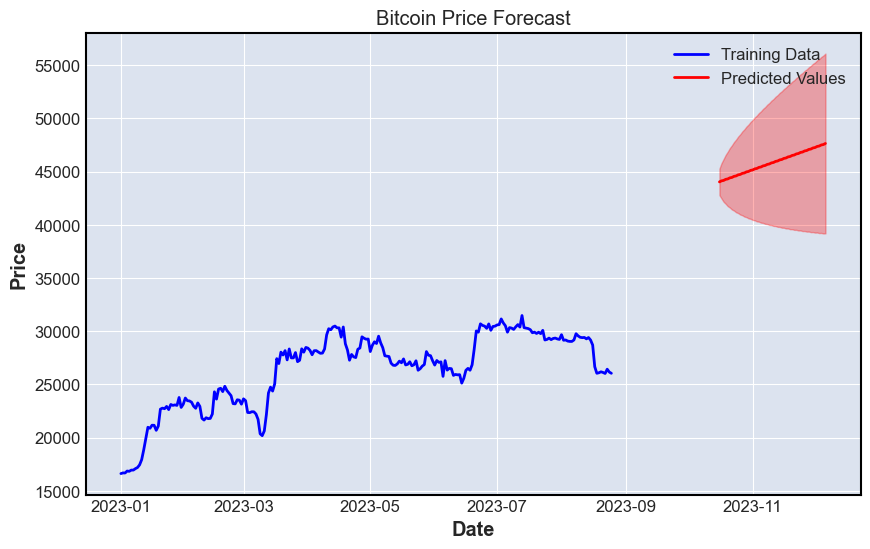

Best RMSE: 553.978025661801
Best Order: (2, 0, 0, 0, 1, 1, 2)


In [33]:
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['y'], label='Training Data', color='blue')
plt.plot(forecast_df['ds'], forecast_df['yhat'], label='Predicted Values', color='red')
plt.fill_between(forecast_df['ds'], confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='red', alpha=0.3)
plt.title('Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price') 
plt.legend()
plt.show()

print(f"Best RMSE: {best_rmse}")
print(f"Best Order: {best_order}")